# NLP: aplicando processamento de linguagem natural para análise de sentimentos

## 01. Explorando e vetorizando dados textuais

### Conhecendo os dados

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vqrca/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [4]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [5]:
df.shape

(15501, 4)

In [6]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [59]:
print('positiva\n')

df.loc[0, 'avaliacao']

positiva



'Esse smartphone superou minhas expectativas, recomendo'

In [60]:
print('negativa\n')

df.loc[1, 'avaliacao']

negativa



'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..'

### Transformando textos em dados numéricos

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [10]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [11]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [12]:
matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [13]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df['avaliacao'])
print(bag_of_words.shape)

(15501, 50)


In [14]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Classificando os sentimentos

In [15]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df['sentimento'], random_state=4978)

In [16]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(acuracia)

0.7982456140350878


### Mão na massa: criando uma função para classificação de sentimentos

In [76]:
def classificar_texto(df: pd.DataFrame, col_texto: str, col_sentimentos: str) -> float:
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(df[col_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df[col_sentimentos], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{col_texto}': {acuracia * 100:.2f}%")

## 02. Explorando a frequência e o sentimento

### Visualizando as palavras mais frequentes nas avaliações

In [18]:
from wordcloud import WordCloud

In [19]:
todas_palavras = [texto for texto in df['avaliacao']]

In [20]:
todas_palavras[:10]

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [21]:
todas_palavras = ' '.join([texto for texto in df['avaliacao']])

In [22]:
todas_palavras[:100]

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se i'

In [23]:
nuvem_palavras = WordCloud().generate(todas_palavras)

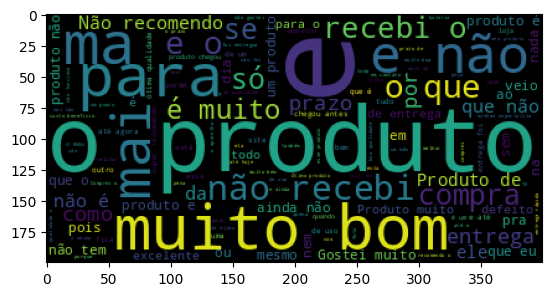

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

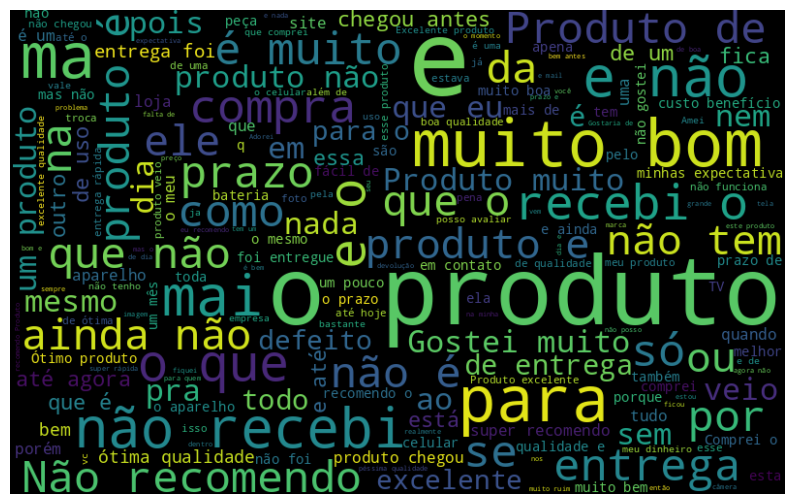

In [25]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

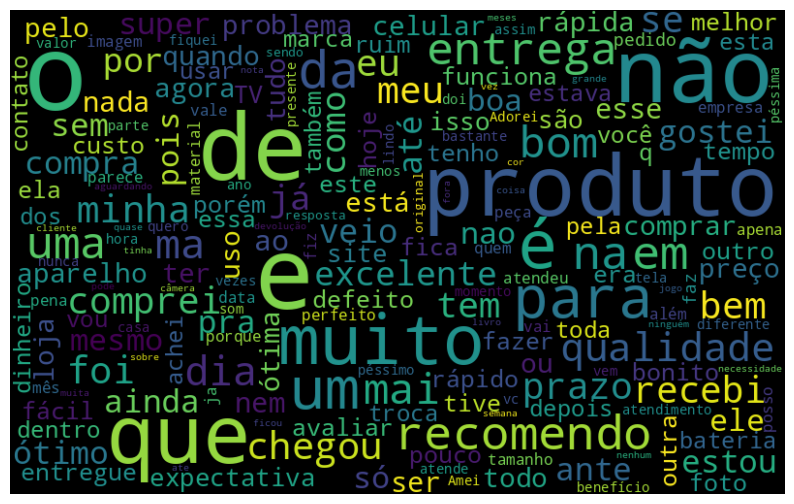

In [26]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

### Analisando palavras por sentimento

In [27]:
def nuvem_palavras(df: pd.DataFrame, col_avaliacao: str, col_sentimento: str) -> None:
    texto_sentimento = df.query(f"sentimento == '{col_sentimento}'")[col_avaliacao]
    texto_unido = ' '.join(texto_sentimento)
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)

    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

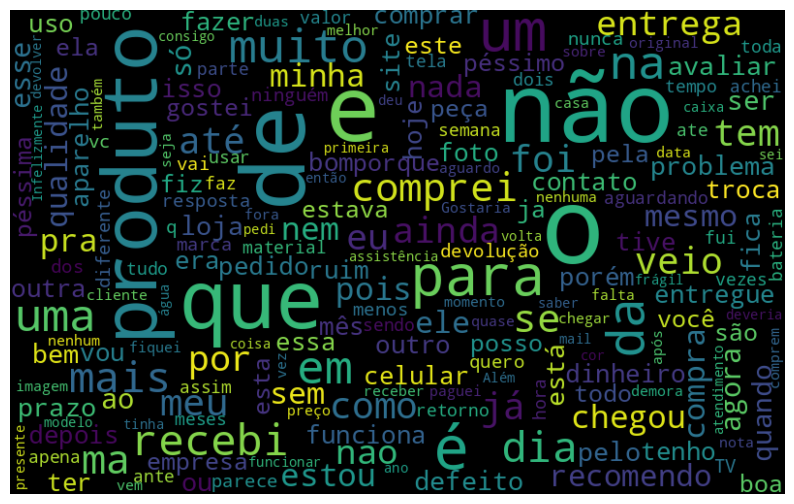

In [28]:
nuvem_palavras(df, 'avaliacao', 'negativo')

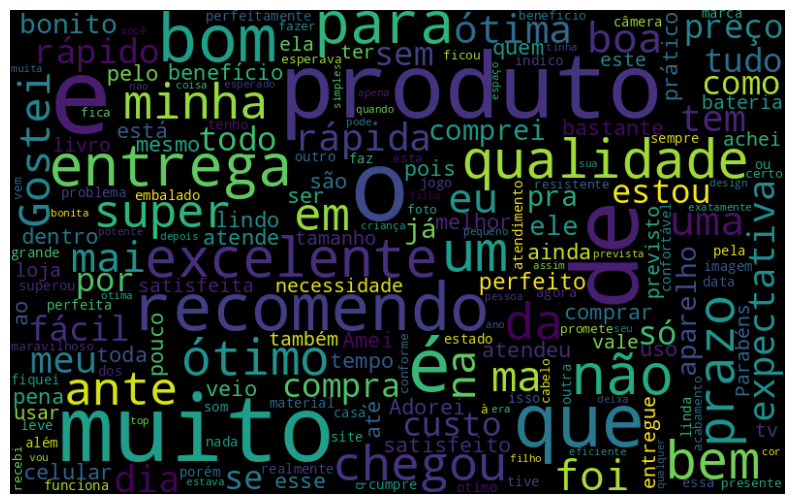

In [29]:
nuvem_palavras(df, 'avaliacao', 'positivo')

### Dividindo o texto em unidades menores

In [30]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package averaged_perce

True

In [31]:
frases = ['Um produto bom', 'Um produto ruim']

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'Um produto bom': 1, 'Um produto ruim': 1})

In [32]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['O',
 'produto',
 'é',
 'excelente',
 'e',
 'a',
 'entrega',
 'foi',
 'muito',
 'rápida!']

### Analisando a frequência das palavras

In [33]:
token_frase = token_espaco.tokenize(todas_palavras)

In [34]:
token_frase[:50]

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu']

In [35]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [36]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

In [37]:
df_frequencia.head()

,Palavra,Frequência
0,Esse,101
1,smartphone,33
2,superou,90
3,minhas,533
4,"expectativas,",79


In [38]:
df_frequencia.nlargest(10, columns='Frequência')

,Palavra,Frequência
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


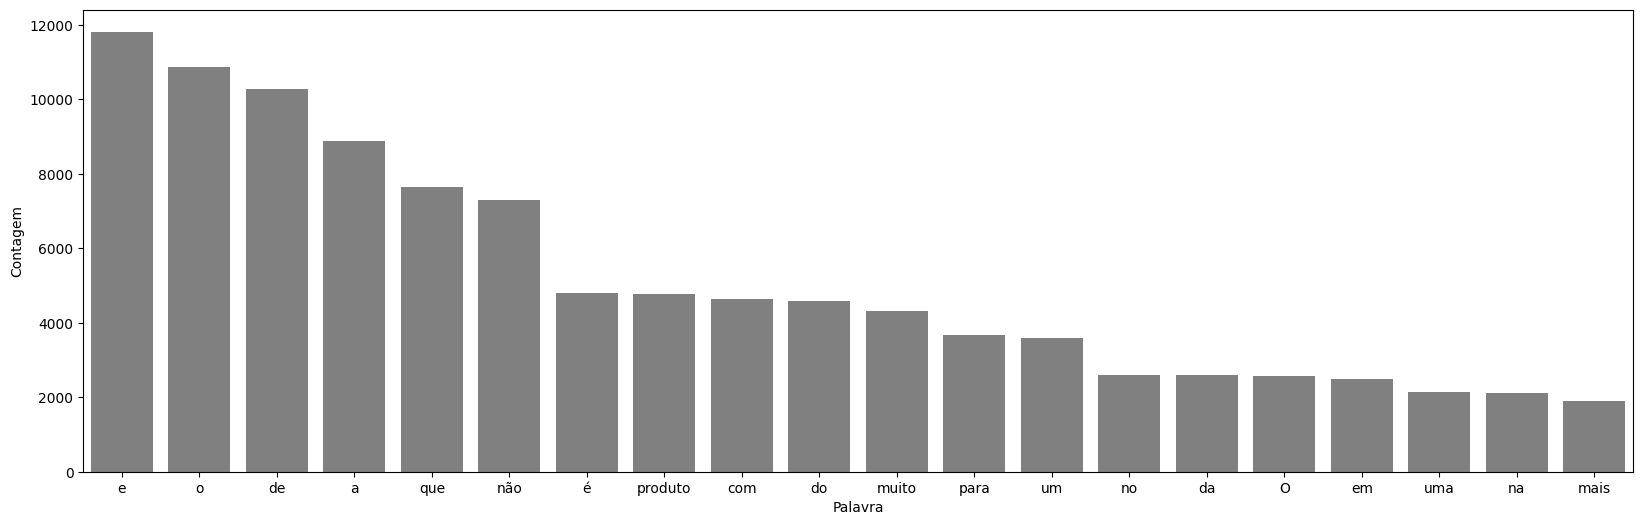

In [39]:
import seaborn as sns

plt.figure(figsize=(20, 6))
ax = sns.barplot(df_frequencia.nlargest(20, columns='Frequência'), x='Palavra', y='Frequência', color='gray')
ax.set(ylabel='Contagem')
plt.show()

### Mão na massa: criando uma função para visualizar a frequência de palavras

In [40]:
def grafico_frequencia(df: pd.DataFrame, col_texto: str, n_palavras: int) -> None:
    todas_palavras = ' '.join([texto for texto in df[col_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                  'Frequência': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(n_palavras, columns='Frequência')

    plt.figure(figsize=(20, 6))
    ax = sns.barplot(df_frequencia, x='Palavra', y='Frequência', color='gray')
    ax.set(ylabel='Contagem')
    plt.show()

## 03. Limpando e normalizando dados textuais

### Removendo stopwords

In [41]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [42]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [43]:
frase_processada = []
for opiniao in df['avaliacao']:
    palavras_texto = token_espaco.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

In [44]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [58]:
df.loc[0, 'avaliacao']

'Esse smartphone superou minhas expectativas, recomendo'

In [57]:
df.loc[0, 'tratamento_1']

'Esse smartphone superou expectativas, recomendo'

In [78]:
classificar_texto(df, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


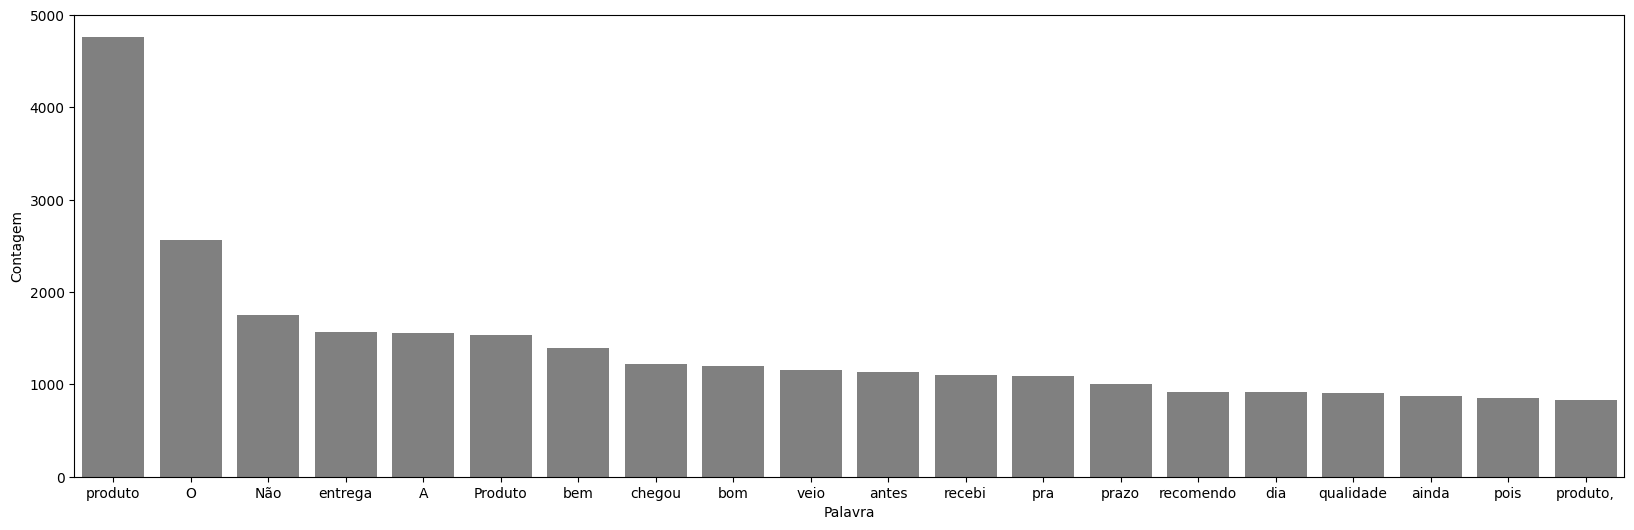

In [48]:
grafico_frequencia(df, 'tratamento_1', 20)

### Removendo pontuação

In [49]:
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']

In [50]:
frase_processada = []

for opiniao in df['tratamento_1']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [51]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...


In [55]:
df.loc[10, 'tratamento_1']

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [56]:
df.loc[10, 'tratamento_2']

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

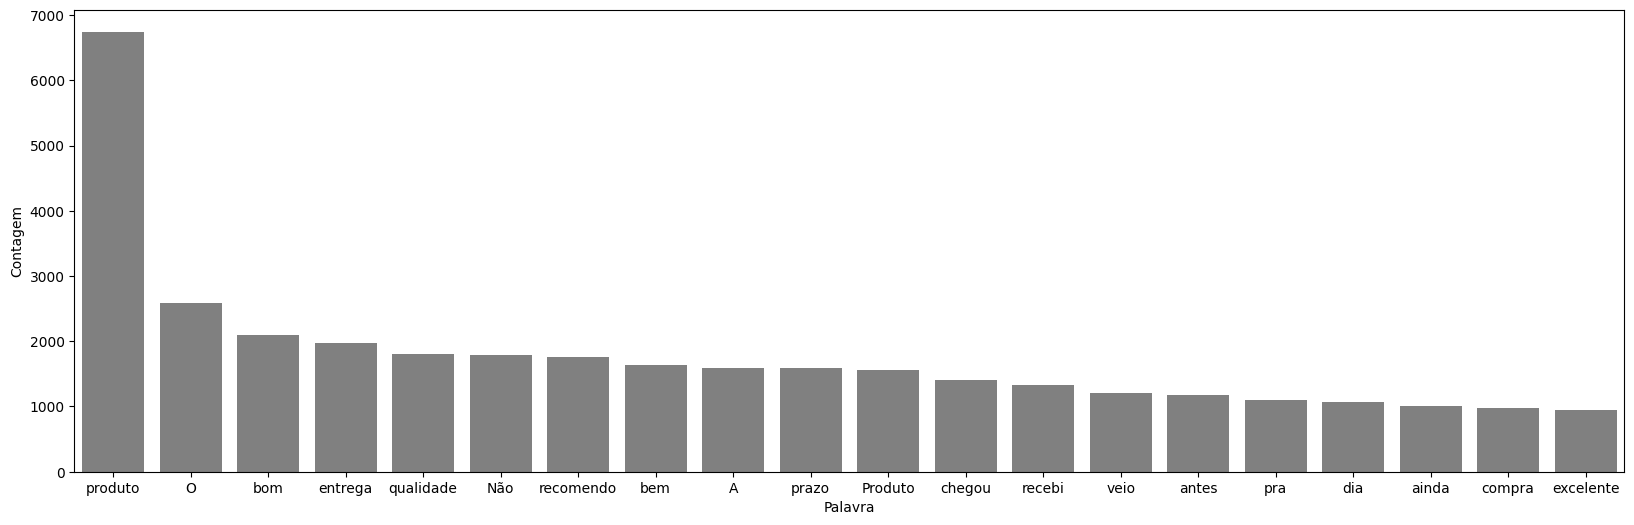

In [54]:
grafico_frequencia(df, 'tratamento_2', 20)

### Removendo acentuação

In [61]:
from unidecode import unidecode

frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode(frase)
teste

'Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante'

In [62]:
sem_acentos = [unidecode(texto) for texto in df['tratamento_2']]

In [63]:
stop_words_sem_acento = [unidecode(texto) for texto in palavras_irrelevantes]

In [65]:
df['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in df['tratamento_3']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_words_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [66]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...


In [67]:
df.loc[70, 'tratamento_2']

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [68]:
df.loc[70, 'tratamento_3']

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

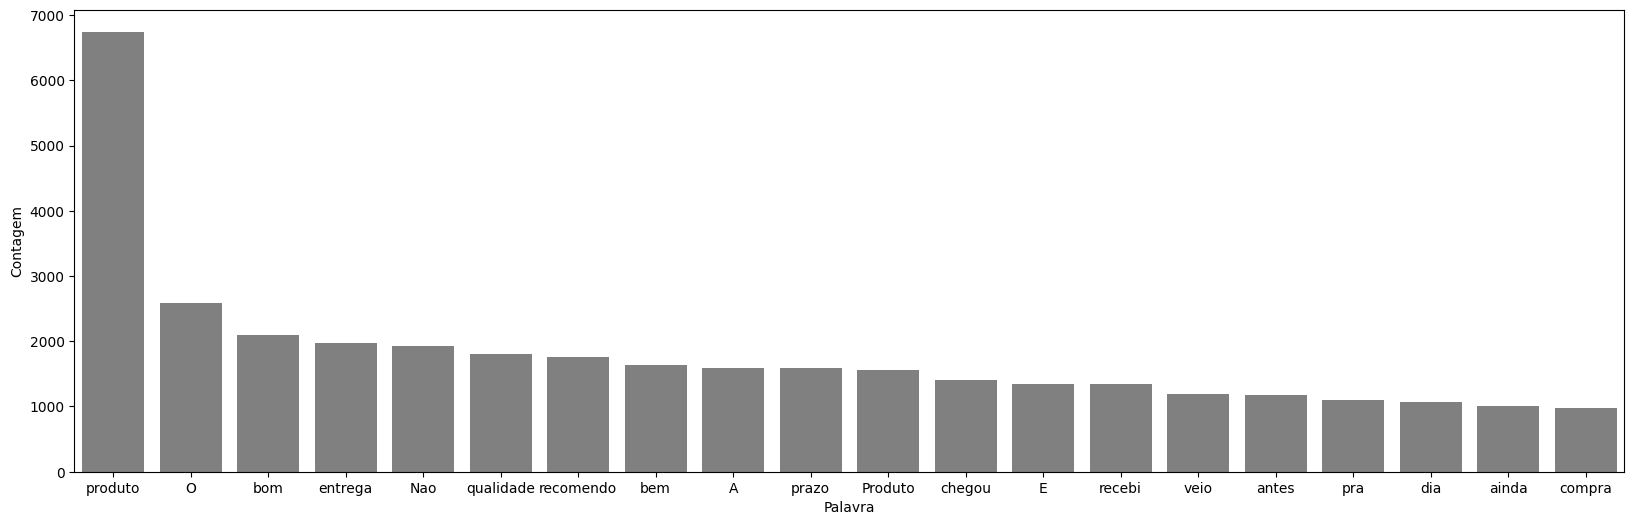

In [69]:
grafico_frequencia(df, 'tratamento_3', 20)

### Uniformizando o texto

In [70]:
frase = 'Bom produto otimo custo beneficio Recomendo Confortavel bem acabado'
frase.lower()

'bom produto otimo custo beneficio recomendo confortavel bem acabado'

In [71]:
frase_processada = []

for opiniao in df['tratamento_3']:
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_words_sem_acento]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [72]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,smartphone superou expectativas recomendo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo,cheiro desagradavel pra incomoda recomendoo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,fiz compra loja entregou produto compra feita ...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,atendeu expectativas achei luz ruim nada dific...
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,gostei achei ficou desejar qualidade fotos ach...


In [73]:
df.loc[3, 'tratamento_3']

'Atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [74]:
df.loc[3, 'tratamento_4']

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [77]:
classificar_texto(df, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.75%


### Mãos na massa: criando nuvens de palavras após o tratamento dos dados

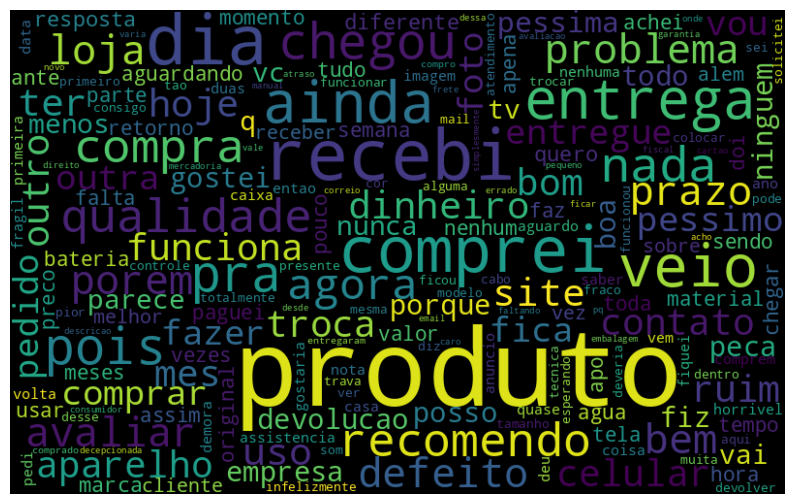

In [81]:
nuvem_palavras(df, 'tratamento_4', 'negativo')

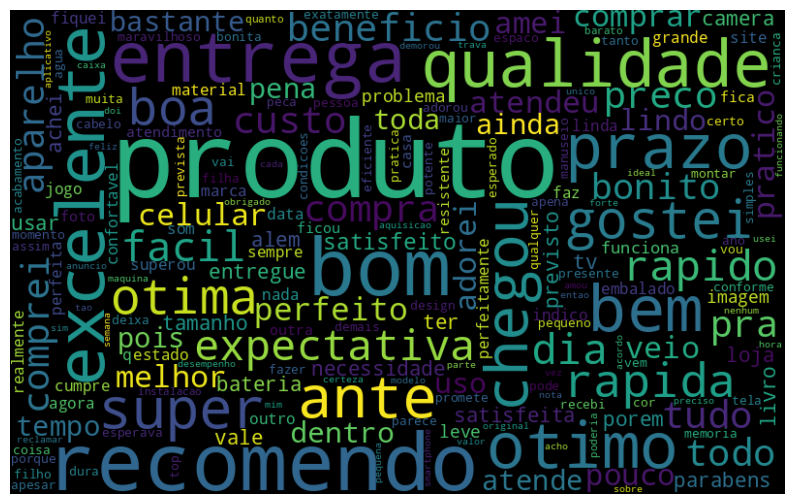

In [83]:
nuvem_palavras(df, 'tratamento_4', 'positivo')

## 04. Utilizando outras técnica de processamento de texto

### Simplificando as palavras

In [84]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('gostei')

'gost'

In [85]:
stemmer.stem('gostado')

'gost'

In [86]:
stemmer.stem('gostou')

'gost'

In [87]:
frase_processada = []

for opiniao in df['tratamento_4']:
    palavras_texto = token_pontuacao.tokenize(opiniao)
    nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada

In [88]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo",Esse smartphone superou expectativas recomendo,Esse smartphone superou expectativas recomendo,smartphone superou expectativas recomendo,smartphon super expect recom
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...,cheiro desagradavel pra incomoda nao recomendoo,cheiro desagradavel pra incomoda recomendoo,cheiro desagradavel pra incomoda recomendoo,cheir desagrada pra incomod recomendo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe...",Eu fiz compra loja entregou produto compra fei...,Eu fiz compra loja entregou produto compra fei...,fiz compra loja entregou produto compra feita ...,fiz compr loj entreg produt compr feit carta c...
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif...",Atendeu expectativas achei luz ruim nada dific...,Atendeu expectativas achei luz ruim nada dific...,atendeu expectativas achei luz ruim nada dific...,atend expect ach luz ruim nad dificult funcion
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo...",Gostei achei ficou desejar qualidade fotos Ach...,Gostei achei ficou desejar qualidade fotos Ach...,gostei achei ficou desejar qualidade fotos ach...,gost ach fic desej qual fot ach bem melhor


In [89]:
df.loc[3, 'tratamento_4']

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [90]:
df.loc[3, 'tratamento_5']

'atend expect ach luz ruim nad dificult funcion'

In [91]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.11%


### Para saber mais: técnicas para simplificar palavras

[Lemmatization vs. stemming: quando usar cada uma?](https://www.alura.com.br/artigos/lemmatization-vs-stemming-quando-usar-cada-uma)

### Determinando a importância das palavras

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(), columns=tfidf.get_feature_names_out())

,Comprei,produto,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [95]:
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidf_bruto * 100:.2f}%")

Acurácia do modelo: 79.54%


In [96]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia_tfidf_tratados * 100:.2f}%")

Acurácia do modelo: 85.14%


### Capturando contextos

In [97]:
from nltk import ngrams

frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [98]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1, 2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%")

Acurácia do modelo com 50 features e ngrams: 85.22%


### Para saber mais: TF-IDF e N-grams

Até o vídeo anterior, utilizamos o método *Bag of Words* para converter texto em dados numéricos que pudessem ser usados pelos modelos de machine learning. Essa técnica simples, porém eficaz, nos permitiu transformar palavras em vetores de frequências, mas tem suas limitações. O *Bag of Words* ignora a ordem das palavras e trata todas elas como igualmente importantes, o que pode fazer com que nuances do texto sejam perdidas.

Para superar essas limitações e trazer mais contexto para a análise de texto, introduzimos duas técnicas mais avançadas: **TF-IDF** e **N-grams**. Ambas são fundamentais para **melhorar a compreensão do significado do texto**, capturando informações importantes que o *Bag of Words* deixa de lado.

#### TF-IDF

O TF-IDF (*Term Frequency - Inverse Document Frequency*, Frequência do Termo - Frequência Inversa nos Documentos) pondera as palavras com base em sua relevância. Em vez de simplesmente contar quantas vezes uma palavra aparece em um documento, o TF-IDF também leva em consideração o quão comum ou rara essa palavra é em todos os documentos do conjunto de dados.

O cálculo do TF-IDF é uma combinação de duas métricas principais: TF (Frequência do Termo) e IDF (Frequência Inversa nos Documentos). Vamos detalhar cada uma delas e, em seguida, mostrar como elas se combinam para formar o valor final do TF-IDF:

#### TF (Term Frequency) - Frequdência do Termo

Imagine que você está lendo um documento, como um artigo ou uma página da web. Algumas palavras aparecem mais vezes do que outras. O TF simplesmente mede **quantas vezes uma palavra específica aparece** nesse documento, em relação ao total de palavras.

Por exemplo, se a palavra "ótimo" aparece 3 vezes em um documento que tem 100 palavras no total, o TF seria:

> TF(ótimo) = 3 / 100 = 0.03

Isso significa que a palavra "ótimo" aparece em 3% do documento.

#### IDF (Inverse Document Frequency) - Frequência Inversa nos Documentos

Já o IDF serve para dar mais peso às palavras que aparecem em poucos documentos e menos peso às que aparecem em muitos. Por exemplo, se você tem 1000 documentos e a palavra "ótimo" aparece em apenas 10 desses documentos, isso significa que "ótimo" é uma palavra relativamente rara e, portanto, importante.

A fórmula do IDF faz esse ajuste, levando em conta o número total de documentos e o número de documentos em que a palavra aparece. Para evitar divisão por zero quando a palavra não aparece em nenhum documento, somamos 1 no denominador. Assim, se você tem 1000 documentos e a palavra "ótimo" aparece em apenas 10 deles, o cálculo seria assim:

> IDF(ótimo) = log(1000 / (10 + 1)) = log(1000 / 11) ≃ 1.96

Aqui, o IDF nos diz que "ótimo" não aparece em muitos documentos, então é uma palavra relevante quando aparece.

#### TF-IDF

Agora, juntamos essas duas ideias. O TF-IDF pega o **TF** (quantas vezes uma palavra aparece em um documento) e **multiplica pelo IDF** (quão rara é essa palavra nos outros documentos):

- O TF de "ótimo" no documento foi 0.03
- O IDF de "ótimo" foi 1.96

Então, o TF-IDF é:

> TF-IDF(ótimo) = 0.03 * 1.96 = 0.059

O resultado final nos diz que a palavra "ótimo", embora apareça algumas vezes no documento, é mais importante porque não é tão comum nos outros documentos.

#### N-grams

Outra técnica que complementa o TF-IDF é a dos N-grams. Ao contrário do Bag of Words, que trata cada palavra de forma isolada, os **N-grams capturam grupos de palavras consecutivas**, o que nos permite entender melhor o **contexto e a relação** entre elas.

Por exemplo, ao trabalhar com **unigrams**, olhamos para palavras individuais. Na frase "Comprei um ótimo produto", os unigrams seriam "Comprei", "um", "ótimo", "produto". Já com **bigrams**, consideramos pares de palavras consecutivas, como ("Comprei", "um"), ("um", "ótimo") e ("ótimo", "produto").

Os N-grams são essenciais para capturar expressões e sequências que carregam significados únicos. Por exemplo, palavras como "muito bom" têm um sentido diferente quando aparecem juntas, comparado a quando estão separadas no texto. Ao usar N-grams, o modelo pode entender melhor a estrutura do texto e identificar padrões que uma análise de palavras individuais não conseguiria captar.

Ao integrar TF-IDF com N-grams, superamos algumas das limitações do *Bag of Words*. Juntas, essas técnicas podem ajudar a melhorar o desempenho do modelo em tarefas de processamento de linguagem natural, como análise de sentimentos.

### Explorando a quantidade de features na vetorização

In [99]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1, 2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%")

Acurácia do modelo com 100 features e ngrams: 88.26%


In [107]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1_000, ngram_range=(1, 2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%")

Acurácia do modelo com 1000 features e ngrams: 91.82%


In [104]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%")

Acurácia do modelo com todas as features e ngrams: 91.85%


In [106]:
vetor_tfidf.shape

(15501, 114123)

In [108]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)

In [109]:
pesos.nlargest(50, 0)

,0
otim,7.768622
excel,7.434310
bom,5.992472
perfeit,5.095744
ador,5.061530
satisfeit,4.851327
rap,4.111716
lind,3.786697
ame,3.528679
maravilh,3.499727


In [111]:
pesos.nsmallest(50, 0)

,0
pess,-4.646657
ruim,-4.077831
receb,-4.043055
frac,-3.730763
horri,-3.390059
fragil,-3.047032
defeit,-3.036854
devolv,-2.941940
decepcion,-2.900837
dinh,-2.703828


## 05. Testando o modelo de classificação

### Salvando e carregando o modelo

In [112]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [114]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

### Criando uma função para processar novos dados

In [115]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = nltk.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao: str) -> str:
    tokens = token_pontuacao.tokenize(avaliacao)
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]
    frase_processada = [unidecode(palavra) for palavra in frase_processada]
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]
    return ' '.join(frase_processada)

### Classificando novas avaliações

In [119]:
novas_avaliacoes = [
    'Ótimo produto, super recomendo',
    'A entrega atrasou muito! Estou decepcionado com a compra',
    'Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo',
    'Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.',
    '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
    Mas, no fim, deu tudo certo e recebi o produto. Produto de ótima qualidade, atendendo bem as minhas necessidades e por
    um preço super em conta. Recomendo.'''
]

In [120]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [121]:
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [122]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Sentimento previsto': predicoes
})

df_previsoes

,Avaliação,Sentimento previsto
0,"Ótimo produto, super recomendo",positivo
1,A entrega atrasou muito! Estou decepcionado co...,negativo
2,Muito satisfeito com a compra. Além de ter ate...,positivo
3,Horrível!!! O produto chegou danificado e agor...,negativo
4,"Rastreando o pacote, achei que não fosse receb...",positivo


## Para ir mais a fundo

[Documentação Biblioteca nltk (Natural Language Toolkit)](https://www.nltk.org/)

[Documentação Biblioteca scikit-learn](https://scikit-learn.org/stable/index.html)